In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

# Create a simple model for the classification task
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)



169001437/169001437 [==============================] - 14s 0us/step


Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 3.9820 - accuracy: 0.0891 - val_loss: 3.5019 - val_accuracy: 0.1638
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3002 - accuracy: 0.1999 - val_loss: 3.1461 - val_accuracy: 0.2256
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.9906 - accuracy: 0.2593 - val_loss: 2.9571 - val_accuracy: 0.2681
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7863 - accuracy: 0.2985 - val_loss: 2.8663 - val_accuracy: 0.2823
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6354 - accuracy: 0.3292 - val_loss: 2.7065 - val_accuracy: 0.3178
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5160 - accuracy: 0.3554 - val_loss: 2.6522 - val_accuracy: 0.3323
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4168 - accuracy: 0.3742 - val_loss: 2.5599 - val_accuracy

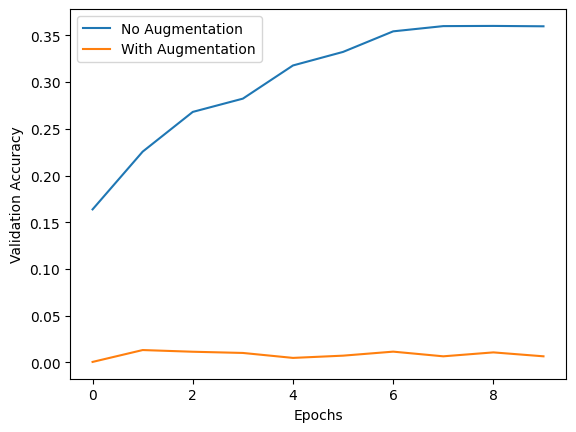

In [ ]:
# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
train_generator = data_gen.flow(x_train, y_train, batch_size=64)
history_aug = model_aug.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# **a) l1 l2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 3.8541 - accuracy: 0.1137 - val_loss: 3.3846 - val_accuracy: 0.1909
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.1597 - accuracy: 0.2309 - val_loss: 3.0231 - val_accuracy: 0.2634
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8849 - accuracy: 0.2840 - val_loss: 2.9043 - val_accuracy: 0.2849
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.7011 - accuracy: 0.3211 - val_loss: 2.7601 - val_accuracy: 0.3164
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5701 - accuracy: 0.3491 - val_loss: 2.6784 - val_accuracy: 0.3265
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.4701 - accuracy: 0.3698 - val_loss: 2.6307 - val_accuracy: 0.3425
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.3900 - accuracy: 0.3851 - val_loss: 2.6115 - val_accuracy

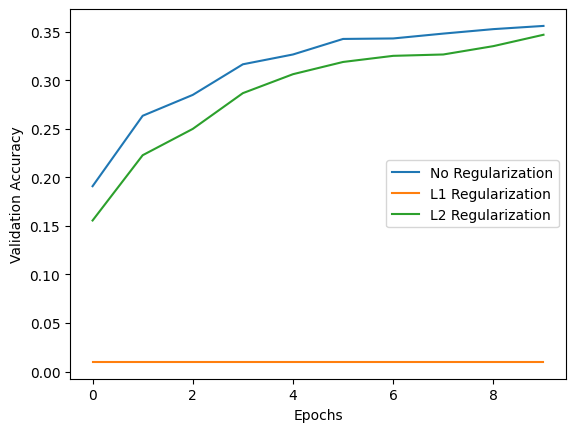

In [ ]:
def create_model(regularizer_type="l1", reg_lambda=0.001):
    regularizer = None
    if regularizer_type == "l1":
        regularizer = tf.keras.regularizers.l1(reg_lambda)
    elif regularizer_type == "l2":
        regularizer = tf.keras.regularizers.l2(reg_lambda)

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=regularizer),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

#without regularization
model_no_reg = create_model(regularizer_type=None)
history_no_reg = model_no_reg.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#with L1 regularization
model_l1 = create_model(regularizer_type="l1", reg_lambda=0.001)
history_l1 = model_l1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#with L2 regularization
model_l2 = create_model(regularizer_type="l2", reg_lambda=0.001)
history_l2 = model_l2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_reg.history["val_accuracy"], label="No Regularization")
plt.plot(history_l1.history["val_accuracy"], label="L1 Regularization")
plt.plot(history_l2.history["val_accuracy"], label="L2 Regularization")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# b) **dropout**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 3.7538 - accuracy: 0.1334 - val_loss: 3.2937 - val_accuracy: 0.2128
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.0533 - accuracy: 0.2545 - val_loss: 2.9785 - val_accuracy: 0.2697
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.7600 - accuracy: 0.3105 - val_loss: 2.8135 - val_accuracy: 0.3026
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.5704 - accuracy: 0.3495 - val_loss: 2.6841 - val_accuracy: 0.3286
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.4408 - accuracy: 0.3766 - val_loss: 2.6052 - val_accuracy: 0.3428
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3406 - accuracy: 0.3997 - val_loss: 2.5639 - val_accuracy: 0.3564
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2543 - accuracy: 0.4153 - val_loss: 2.5530 - val_accuracy

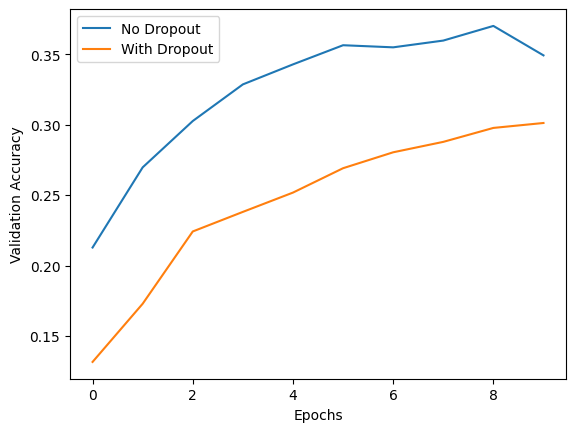

In [ ]:
def create_model(dropout_rate=0.0):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32 ,32 ,3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

#without dropout regularization
model_no_dropout = create_model(dropout_rate=0.0)
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#with dropout regularization
model_dropout = create_model(dropout_rate=0.5)
history_dropout = model_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

plt.plot(history_no_dropout.history["val_accuracy"], label="No Dropout")
plt.plot(history_dropout.history["val_accuracy"], label="With Dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# **c) earlystop**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 3.8246 - accuracy: 0.1203 - val_loss: 3.3567 - val_accuracy: 0.1955
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.1385 - accuracy: 0.2359 - val_loss: 2.9981 - val_accuracy: 0.2654
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.8258 - accuracy: 0.2966 - val_loss: 2.7803 - val_accuracy: 0.3145
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.6324 - accuracy: 0.3377 - val_loss: 2.6957 - val_accuracy: 0.3244
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.5010 - accuracy: 0.3632 - val_loss: 2.6461 - val_accuracy: 0.3400
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3993 - accuracy: 0.3824 - val_loss: 2.6290 - val_accuracy: 0.3393
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3088 - accuracy: 0.4040 - val_loss: 2.5623 - val_accuracy

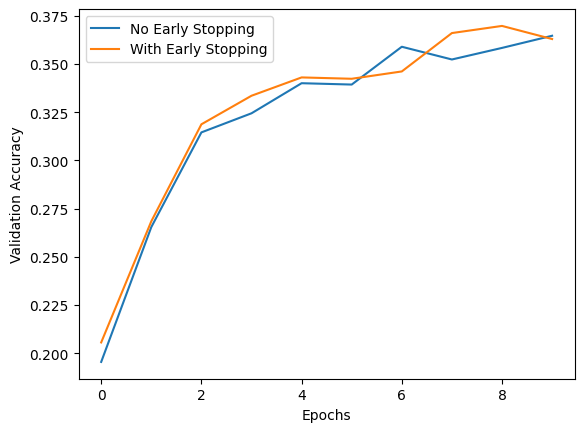

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without early stopping
model_no_earlystop = create_model()
history_no_earlystop = model_no_earlystop.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with early stopping
model_earlystop = create_model()
earlystop_callback = EarlyStopping(monitor="val_loss", patience=3)
history_earlystop = model_earlystop.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[earlystop_callback])

# Compare the performance
plt.plot(history_no_earlystop.history["val_accuracy"], label="No Early Stopping")
plt.plot(history_earlystop.history["val_accuracy"], label="With Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# **d) montecarlo dropout**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

In [ ]:
def create_model(dropout_rate=0.5):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model with dropout regularization
model = create_model(dropout_rate=0.5)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Monte Carlo Dropout: perform multiple forward passes with dropout enabled and average the predictions
def monte_carlo_dropout_predictions(model, samples, T=100):
    mc_dropout_predictions = []
    for t in range(T):
        predictions = model(samples, training=True)
        mc_dropout_predictions.append(predictions)
    
    mc_dropout_predictions = tf.stack(mc_dropout_predictions, axis=0)
    averaged_predictions = tf.reduce_mean(mc_dropout_predictions, axis=0)
    return averaged_predictions

# Calculate Monte Carlo Dropout predictions for test set
mc_dropout_test_predictions = monte_carlo_dropout_predictions(model, x_test)

# Calculate accuracy
correct_predictions = tf.equal(tf.argmax(mc_dropout_test_predictions, axis=1), y_test.flatten())
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

print(f"Monte Carlo Dropout test accuracy: {accuracy:.4f}")


Epoch 1/10
1563/1563 [==============================] - 19s 6ms/step - loss: 4.2420 - accuracy: 0.0509 - val_loss: 3.7947 - val_accuracy: 0.1311
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 3.8227 - accuracy: 0.1052 - val_loss: 3.4374 - val_accuracy: 0.1931
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.6521 - accuracy: 0.1287 - val_loss: 3.2847 - val_accuracy: 0.2183
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.5531 - accuracy: 0.1457 - val_loss: 3.2496 - val_accuracy: 0.2340
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 3.4647 - accuracy: 0.1594 - val_loss: 3.1179 - val_accuracy: 0.2540
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.4068 - accuracy: 0.1668 - val_loss: 3.0587 - val_accuracy: 0.2684
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 3.3539 - accuracy: 0.1786 - val_loss: 3.0041 - val_accura

weight initializations in TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Training with Zeros initializer
Training with Ones initializer
Training with RandomNormal initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with RandomUniform initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with GlorotNormal initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with GlorotUniform initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with HeNormal initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Training with HeUniform initializer


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


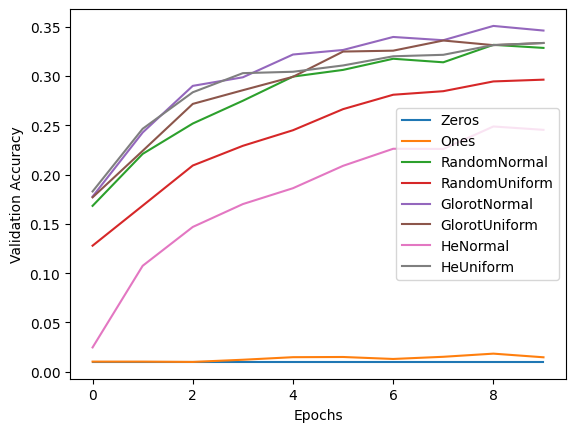

In [ ]:
def create_model(initializer):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), kernel_initializer=initializer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu", kernel_initializer=initializer),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_initializer=initializer),
        tf.keras.layers.Dense(100, activation="softmax", kernel_initializer=initializer)
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Training with different initializations
initializers = {
    "Zeros": tf.keras.initializers.Zeros(),
    "Ones": tf.keras.initializers.Ones(),
    "RandomNormal": tf.keras.initializers.RandomNormal(),
    "RandomUniform": tf.keras.initializers.RandomUniform(),
    "GlorotNormal": tf.keras.initializers.GlorotNormal(),
    "GlorotUniform": tf.keras.initializers.GlorotUniform(),
    "HeNormal": tf.keras.initializers.HeNormal(),
    "HeUniform": tf.keras.initializers.HeUniform(),
}

histories = {}

for name, initializer in initializers.items():
    print(f"Training with {name} initializer")
    model = create_model(initializer)
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
    histories[name] = history

# Compare the performance
for name, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=name)

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# **f) batch norm**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Epoch 1/10
1563/1563 [==============================] - 11s 5ms/step - loss: 3.9131 - accuracy: 0.1033 - val_loss: 3.4734 - val_accuracy: 0.1702
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 3.2428 - accuracy: 0.2142 - val_loss: 3.1029 - val_accuracy: 0.2407
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.9509 - accuracy: 0.2710 - val_loss: 2.9106 - val_accuracy: 0.2807
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.7704 - accuracy: 0.3070 - val_loss: 2.8843 - val_accuracy: 0.2910
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.6429 - accuracy: 0.3307 - val_loss: 2.7113 - val_accuracy: 0.3266
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.5566 - accuracy: 0.3494 - val_loss: 2.6986 - val_accuracy: 0.3261
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.4789 - accuracy: 0.3652 - val_loss: 2.6902 - val_accurac

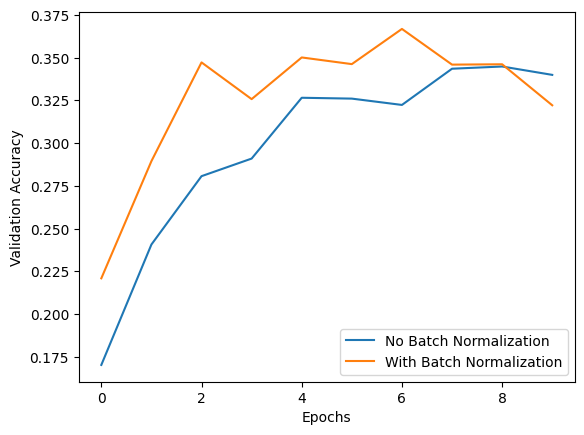

In [ ]:
def create_model(use_batch_norm=False):
    layers = [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(100, activation="softmax")
    ]

    if use_batch_norm:
        layers.insert(2, tf.keras.layers.BatchNormalization())
        layers.insert(5, tf.keras.layers.BatchNormalization())

    model = tf.keras.models.Sequential(layers)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model without batch normalization
model_no_bn = create_model(use_batch_norm=False)
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with batch normalization
model_bn = create_model(use_batch_norm=True)
history_bn = model_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_bn.history["val_accuracy"], label="No Batch Normalization")
plt.plot(history_bn.history["val_accuracy"], label="With Batch Normalization")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# **g) custsom dropout, custom regularization**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 66.4831 - accuracy: 0.0087 - val_loss: 22.5887 - val_accuracy: 0.0100
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 22.5947 - accuracy: 0.0092 - val_loss: 22.7413 - val_accuracy: 0.0100
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 22.5940 - accuracy: 0.0080 - val_loss: 22.1906 - val_accuracy: 0.0100
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 22.5915 - accuracy: 0.0090 - val_loss: 22.7136 - val_accuracy: 0.0100
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 22.5853 - accuracy: 0.0092 - val_loss: 22.6676 - val_accuracy: 0.0100
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 22.5766 - accuracy: 0.0082 - val_loss: 22.6510 - val_accuracy: 0.0100
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 22.5764 - accuracy: 0.0085 - val_loss: 22.4513 

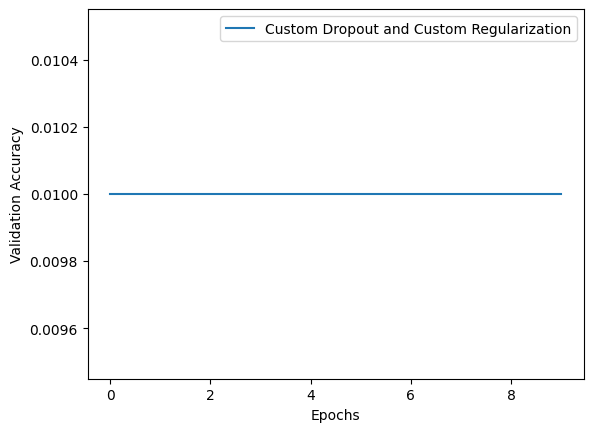

In [ ]:
# Custom dropout layer
class CustomDropout(tf.keras.layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

# Custom L1 regularization
def custom_l1_regularizer(weight_matrix):
    return tf.reduce_sum(tf.abs(weight_matrix))

# Create a simple model with custom dropout and custom regularization
def create_model(dropout_rate=0.5, l1_lambda=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=custom_l1_regularizer),
        CustomDropout(dropout_rate),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Train the model with custom dropout and custom regularization
model = create_model(dropout_rate=0.5, l1_lambda=0.01)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the performance
plt.plot(history.history["val_accuracy"], label="Custom Dropout and Custom Regularization")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# **h) using callbacks and tensorboard**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 4.4423 - accuracy: 0.0287 - val_loss: 4.1915 - val_accuracy: 0.0639
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.2013 - accuracy: 0.0522 - val_loss: 4.0329 - val_accuracy: 0.0955
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.1316 - accuracy: 0.0609 - val_loss: 3.9472 - val_accuracy: 0.1050
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0962 - accuracy: 0.0660 - val_loss: 3.8871 - val_accuracy: 0.1162
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 4.0637 - accuracy: 0.0712 - val_loss: 3.8888 - val_accuracy: 0.1165
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0379 - accuracy: 0.0727 - val_loss: 3.8219 - val_accuracy: 0.1340
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 4.0113 - accuracy: 0.0774 - val_loss: 3.7185 - val_accuracy

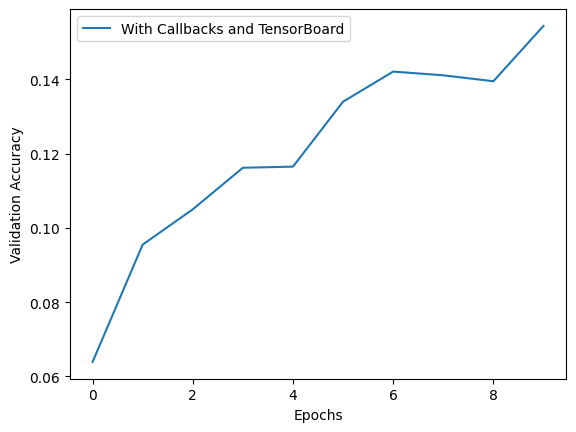

In [ ]:
def create_model(dropout_rate=0.5, l2_lambda=0.01):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l2_lambda)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Create the model
model = create_model(dropout_rate=0.5, l2_lambda=0.01)

# Create a directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


# Callbacks
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)

# Train the model with callbacks
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping_callback, tensorboard_callback])

# Plot the performance
plt.plot(history.history["val_accuracy"], label="With Callbacks and TensorBoard")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 17844), started 0:02:27 ago. (Use '!kill 17844' to kill it.)

<IPython.core.display.Javascript object>

# **i) using keras tuner**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
!pip install keras-tuner
from kerastuner import RandomSearch
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 17.8 MB/s eta 0:00:00


<ipython-input-19-01f52b583f4a>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


Trial 5 Complete [00h 04m 11s]
val_accuracy: 0.2663000027338664

Best val_accuracy So Far: 0.2663000027338664
Total elapsed time: 00h 24m 07s
Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 3.3996 - accuracy: 0.1881 - val_loss: 3.1127 - val_accuracy: 0.2793
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3763 - accuracy: 0.1947 - val_loss: 3.0832 - val_accuracy: 0.2771
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3614 - accuracy: 0.1984 - val_loss: 3.0398 - val_accuracy: 0.2874
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3428 - accuracy: 0.2002 - val_loss: 3.0580 - val_accuracy: 0.2926
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3264 - accuracy: 0.2020 - val_loss: 3.0504 - val_accuracy: 0.2846
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.3145 - accuracy: 0.2056 - val_loss: 3.0093 - val_accuracy: 0

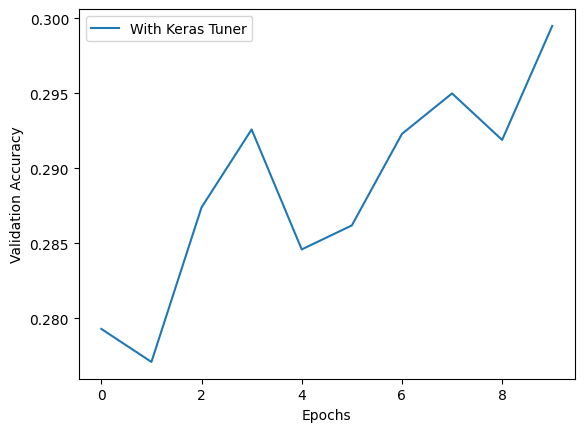

In [ ]:
def build_model(hp):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))

    model.add(tf.keras.layers.Flatten())

    hp_units = hp.Int("units", min_value=32, max_value=128, step=32)
    hp_l2_lambda = hp.Choice("l2_lambda", values=[0.001, 0.01, 0.1])
    hp_dropout_rate = hp.Float("dropout_rate", min_value=0.1, max_value=0.5, step=0.1)

    model.add(tf.keras.layers.Dense(hp_units, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(hp_l2_lambda)))
    model.add(tf.keras.layers.Dropout(hp_dropout_rate))

    model.add(tf.keras.layers.Dense(100, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

# Initialize Keras Tuner
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=3,
    directory="keras_tuner_logs",
    project_name="regularization_tuning"
)

# Run the search
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
history = best_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the performance
plt.plot(history.history["val_accuracy"], label="With Keras Tuner")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


# **j)_ use keras cv data augmentation**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the dataset (cifar100+)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# Normalizing the data
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 3.8094 - accuracy: 0.1217 - val_loss: 3.3048 - val_accuracy: 0.2063
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 3.0967 - accuracy: 0.2428 - val_loss: 2.9784 - val_accuracy: 0.2614
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.7949 - accuracy: 0.3029 - val_loss: 2.7740 - val_accuracy: 0.3091
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.6085 - accuracy: 0.3399 - val_loss: 2.6839 - val_accuracy: 0.3263
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.4775 - accuracy: 0.3660 - val_loss: 2.6328 - val_accuracy: 0.3396
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3790 - accuracy: 0.3878 - val_loss: 2.5921 - val_accuracy: 0.3481
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2874 - accuracy: 0.4080 - val_loss: 2.5958 - val_accuracy

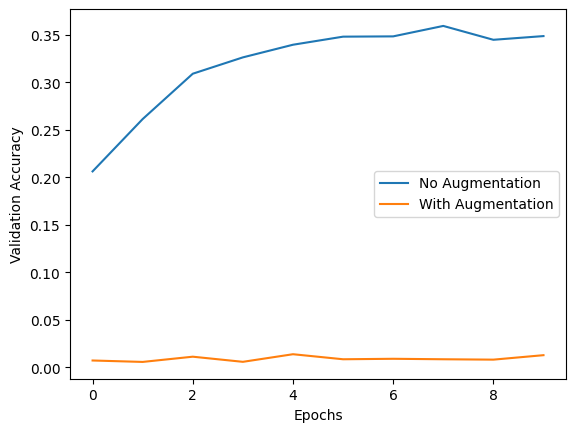

In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(100, activation="softmax")
    ])

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

# Train the model without data augmentation
model_no_aug = create_model()
history_no_aug = model_no_aug.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Train the model with data augmentation
model_aug = create_model()
train_generator = data_gen.flow(x_train, y_train, batch_size=64)
history_aug = model_aug.fit(train_generator, epochs=10, validation_data=(x_test, y_test))

# Compare the performance
plt.plot(history_no_aug.history["val_accuracy"], label="No Augmentation")
plt.plot(history_aug.history["val_accuracy"], label="With Augmentation")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()
